In [127]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
data = pd.read_csv("/content/drive/MyDrive/Time Series Dataset.csv", index_col = 'datetime', parse_dates = True)

array([[<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>],
       [<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>],
       [<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>],
       [<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>],
       [<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>],
       [<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>]],
      dtype=object)

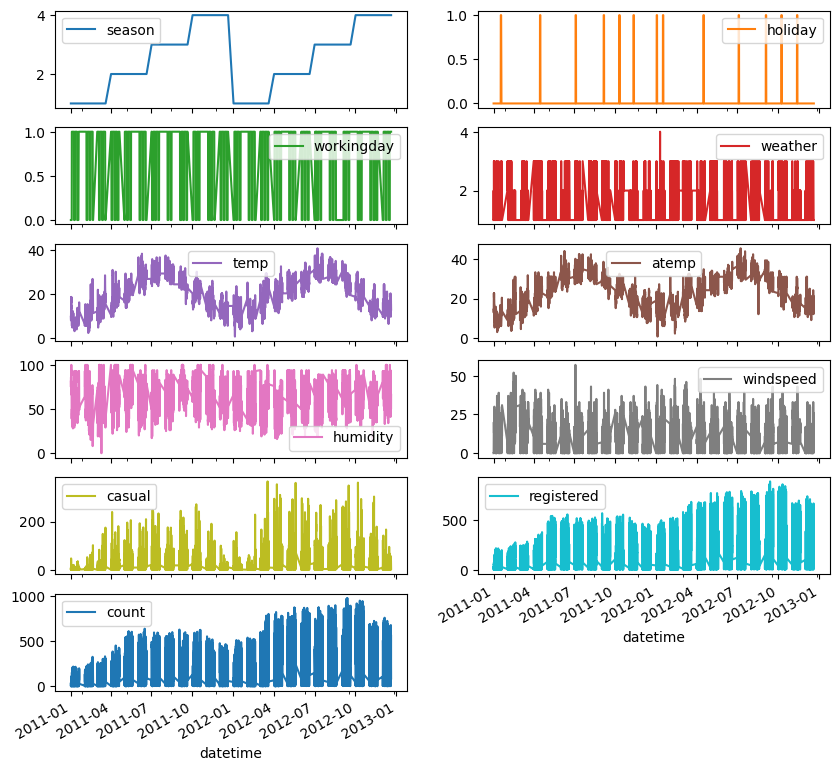

In [130]:
data.plot(subplots = True, layout = (6,2), figsize = (10, 10))

In [131]:
data.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [132]:
data.shape

(10886, 11)

In [133]:
x = data.iloc[:,:-1]

In [134]:
y = data.iloc[:,-1]

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
scaler = MinMaxScaler()
scaler = scaler.fit(x)
scaled_x = scaler.transform(x)

In [137]:
X_train, y_train = [], []
T = 10
for i in range(9000):
    X_train.append(scaled_x[i:i+T])
    y_train.append(y[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(9000-T, 10886-T):
    X_test.append(scaled_x[i:i+T])
    y_test.append(y[i+(T-1)])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

Train data dimensions: (9000, 10, 10), (9000, 1)
Test data dimensions: (1886, 10, 10), (1886, 1)


In [150]:
N = X_train.shape[2]
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (T,N)))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

In [151]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [156]:
model.fit(X_train, y_train, epochs = 10, steps_per_epoch = 150)

Epoch 1/10
150/150 [==============================] - 4s 18ms/step - loss: 3884.5857 - accuracy: 0.0112
Epoch 2/10
150/150 [==============================] - 4s 24ms/step - loss: 2599.7380 - accuracy: 0.0109
Epoch 3/10
150/150 [==============================] - 5s 31ms/step - loss: 1693.3005 - accuracy: 0.0106
Epoch 4/10
150/150 [==============================] - 3s 17ms/step - loss: 1175.3977 - accuracy: 0.0099
Epoch 5/10
150/150 [==============================] - 3s 17ms/step - loss: 1070.9711 - accuracy: 0.0091
Epoch 6/10
150/150 [==============================] - 3s 23ms/step - loss: 729.7039 - accuracy: 0.0087
Epoch 7/10
150/150 [==============================] - 6s 41ms/step - loss: 484.8681 - accuracy: 0.0078
Epoch 8/10
150/150 [==============================] - 5s 35ms/step - loss: 429.8727 - accuracy: 0.0081
Epoch 9/10
150/150 [==============================] - 6s 38ms/step - loss: 310.9515 - accuracy: 0.0080
Epoch 10/10
150/150 [==============================] - 7s 47ms/step 

In [157]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

59/59 [==============================] - 0s 5ms/step
[618.0534] [668]
[404.4575] [378]
[248.30092] [231]
[292.91232] [303]
[361.45163] [365]
[351.83124] [357]
[327.8243] [328]
[373.77658] [383]
[492.6039] [488]
[764.4555] [791]
[698.3382] [669]
[484.4849] [491]
[356.48224] [359]
[252.4498] [255]
[181.31613] [213]
[118.91443] [121]
[94.33327] [105]
[88.37137] [92]
[54.503876] [43]
[42.072044] [30]
[35.444065] [13]
[27.207426] [9]
[35.401955] [27]
[62.789867] [64]
[154.88287] [189]
[302.49557] [292]
[481.95148] [480]
[543.7456] [536]
[624.30853] [654]
[645.77124] [644]
[583.1522] [598]
[579.4186] [596]
[622.49225] [641]
[618.66693] [635]
[551.0874] [554]
[474.8389] [488]
[352.7412] [341]
[302.78244] [338]
[257.21448] [261]
[216.14197] [235]
[178.69662] [187]
[134.97733] [131]
[104.84918] [119]
[67.56079] [55]
[41.04389] [26]
[28.173832] [11]
[29.104124] [20]
[46.046146] [41]
[112.56547] [124]
[256.18576] [270]
[423.64603] [425]
[296.95798] [272]
[271.32742] [298]
[189.24318] [162]
[145.5

In [158]:
from sklearn.metrics import r2_score

In [159]:
r2_score(predict_x, y_test)

0.9926370480906979